In [1]:
import numpy as np               # Aljabar linear
import pandas as pd              # Manipulasi data
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns            # Visualisasi statistik
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

In [13]:
train = pd.read_csv("train.csv")
display(train.head(10))

test = pd.read_csv("test.csv")
display(test.head(10))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [14]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([train, test], sort = False)
display(merged.head(5))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [15]:
# Analisis bentuk data
merged.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000,1000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000,500.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314,288.819436
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,250.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,500.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,750.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1000.000000


In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 22 columns):
battery_power    3000 non-null int64
blue             3000 non-null int64
clock_speed      3000 non-null float64
dual_sim         3000 non-null int64
fc               3000 non-null int64
four_g           3000 non-null int64
int_memory       3000 non-null int64
m_dep            3000 non-null float64
mobile_wt        3000 non-null int64
n_cores          3000 non-null int64
pc               3000 non-null int64
px_height        3000 non-null int64
px_width         3000 non-null int64
ram              3000 non-null int64
sc_h             3000 non-null int64
sc_w             3000 non-null int64
talk_time        3000 non-null int64
three_g          3000 non-null int64
touch_screen     3000 non-null int64
wifi             3000 non-null int64
price_range      2000 non-null float64
id               1000 non-null float64
dtypes: float64(4), int64(18)
memory usage: 539.1 KB


In [19]:
merged.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000,1000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000,500.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314,288.819436
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,250.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,500.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,750.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1000.000000


In [20]:
merged.isna().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [23]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in merged.columns:
    if merged[x].dtype != 'float64' :
        print('crosstab:', x)
        print(merged[[x, 'price_range']].groupby(x, as_index=False).sum())
        print('-'*10, '\n')

crosstab: battery_power
      battery_power  price_range
0               500          0.0
1               501          3.0
2               502          3.0
3               503          4.0
4               504          3.0
5               506          2.0
6               507          2.0
7               508          3.0
8               509          0.0
9               510          5.0
10              511          5.0
11              512          2.0
12              513          2.0
13              514          3.0
14              516          2.0
15              517          3.0
16              518          3.0
17              519          3.0
18              520          1.0
19              521          0.0
20              523          0.0
21              524          0.0
22              525          1.0
23              527          0.0
24              528          2.0
25              529          0.0
26              530          0.0
27              531          3.0
28              532

In [28]:
'''Untuk menganalisis variabel kategori, kami akan membuat tiga fungsi kustom.
Dua fungsi pertama menampilkan label bar dalam skala absolut dan relatif. Dan yang ketiga menciptakan dataframe absolut dan relatif dan juga menghasilkan abs dan frekuensi relatif plot untuk setiap variabel.'''

''' #1.Fungsi untuk menampilkan nilai absolut'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Fungsi untuk menampilkan level bar secara relatif'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Fungsi untuk membuat dataframe frekuensi absolut dan relatif dari setiap variabel. Dan plot frekuensi absolut dan relatif.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

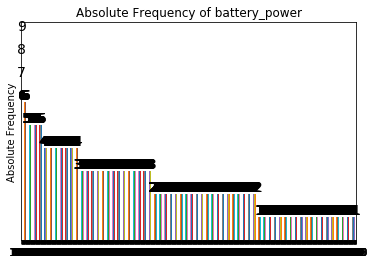

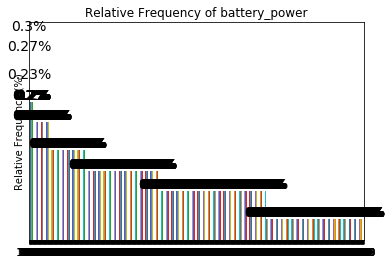

Absolute & Relative Frequency of battery_power :


,Absolute Frequency,Relative Frequency(%)
1715,9,0.30
1807,8,0.27
560,7,0.23
1589,6,0.20
618,6,0.20
1762,6,0.20
1074,6,0.20
1986,6,0.20
1472,6,0.20
986,6,0.20


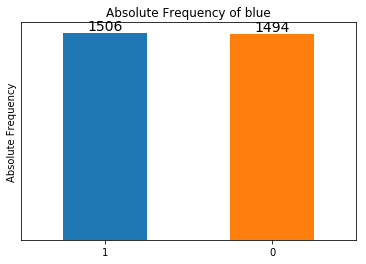

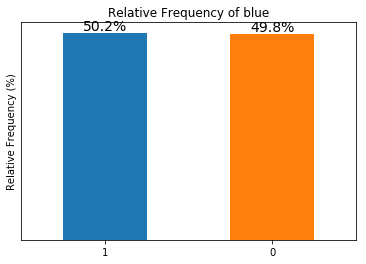

Absolute & Relative Frequency of blue :


,Absolute Frequency,Relative Frequency(%)
1,1506,50.2
0,1494,49.8


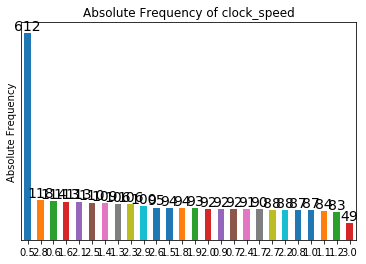

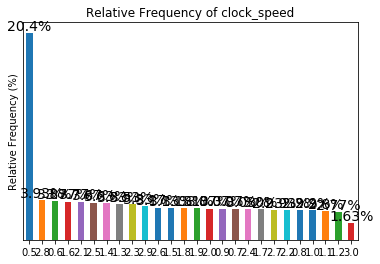

Absolute & Relative Frequency of clock_speed :


,Absolute Frequency,Relative Frequency(%)
0.5,612,20.40
2.8,118,3.93
0.6,114,3.80
1.6,113,3.77
2.1,113,3.77
2.5,110,3.67
1.4,109,3.63
1.3,106,3.53
2.3,106,3.53
2.9,100,3.33


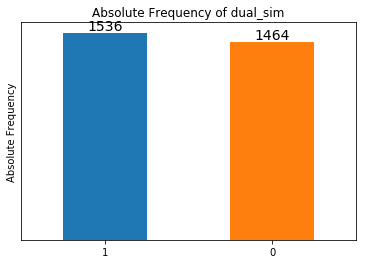

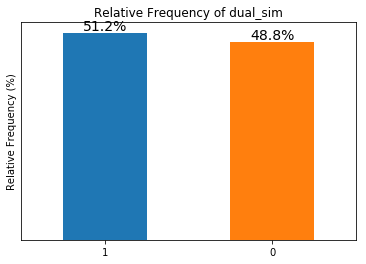

Absolute & Relative Frequency of dual_sim :


,Absolute Frequency,Relative Frequency(%)
1,1536,51.2
0,1464,48.8


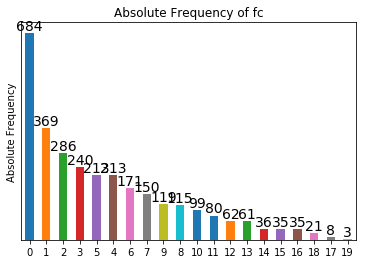

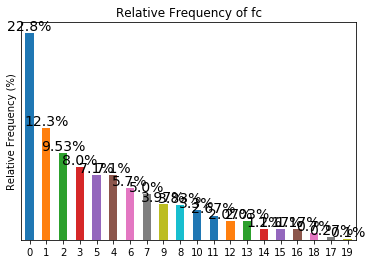

Absolute & Relative Frequency of fc :


,Absolute Frequency,Relative Frequency(%)
0,684,22.80
1,369,12.30
2,286,9.53
3,240,8.00
5,213,7.10
4,213,7.10
6,171,5.70
7,150,5.00
9,119,3.97
8,115,3.83


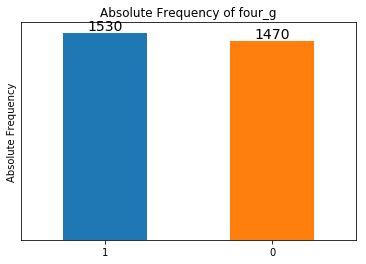

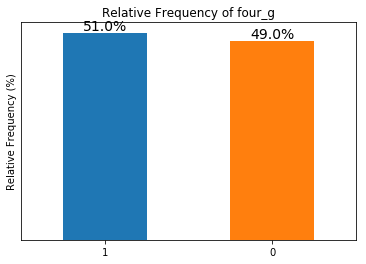

Absolute & Relative Frequency of four_g :


,Absolute Frequency,Relative Frequency(%)
1,1530,51.0
0,1470,49.0


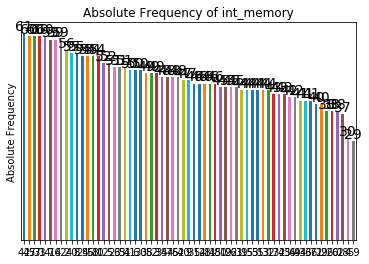

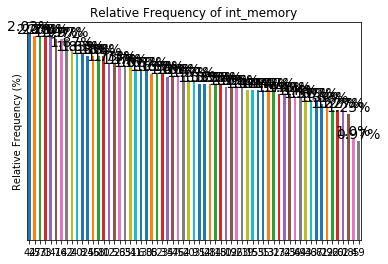

Absolute & Relative Frequency of int_memory :


,Absolute Frequency,Relative Frequency(%)
44,61,2.03
27,60,2.00
57,60,2.00
33,60,2.00
14,60,2.00
7,59,1.97
16,59,1.97
42,59,1.97
2,56,1.87
40,55,1.83


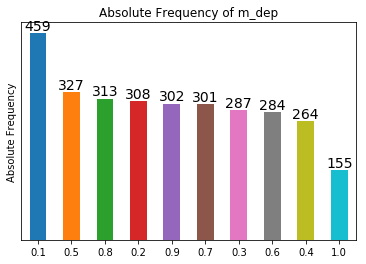

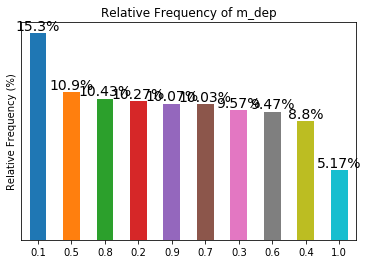

Absolute & Relative Frequency of m_dep :


,Absolute Frequency,Relative Frequency(%)
0.1,459,15.30
0.5,327,10.90
0.8,313,10.43
0.2,308,10.27
0.9,302,10.07
0.7,301,10.03
0.3,287,9.57
0.6,284,9.47
0.4,264,8.80
1.0,155,5.17


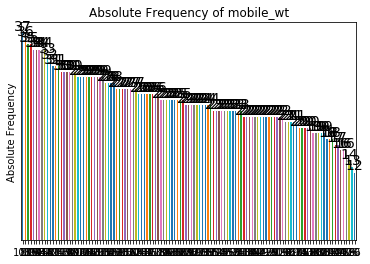

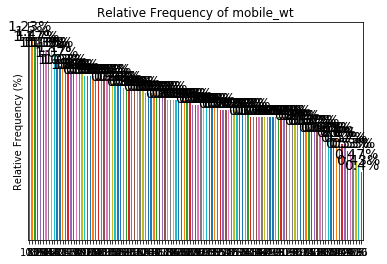

Absolute & Relative Frequency of mobile_wt :


,Absolute Frequency,Relative Frequency(%)
101,37,1.23
83,36,1.20
185,35,1.17
105,35,1.17
199,34,1.13
198,34,1.13
145,34,1.13
182,34,1.13
146,34,1.13
88,33,1.10


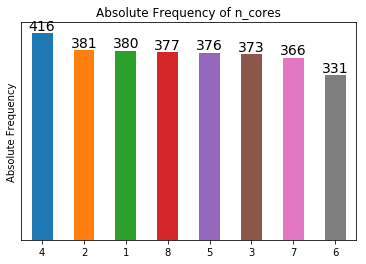

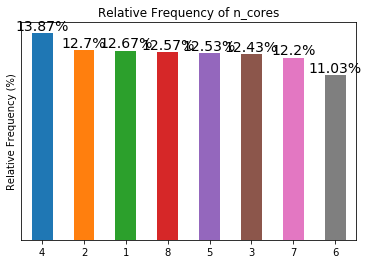

Absolute & Relative Frequency of n_cores :


,Absolute Frequency,Relative Frequency(%)
4,416,13.87
2,381,12.70
1,380,12.67
8,377,12.57
5,376,12.53
3,373,12.43
7,366,12.20
6,331,11.03


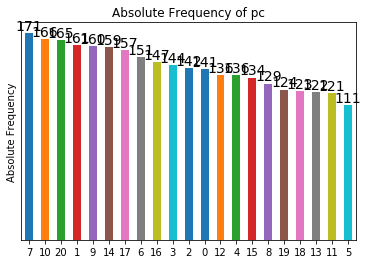

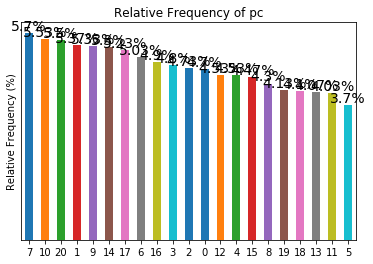

Absolute & Relative Frequency of pc :


,Absolute Frequency,Relative Frequency(%)
7,171,5.70
10,166,5.53
20,165,5.50
1,161,5.37
9,160,5.33
14,159,5.30
17,157,5.23
6,151,5.03
16,147,4.90
3,144,4.80


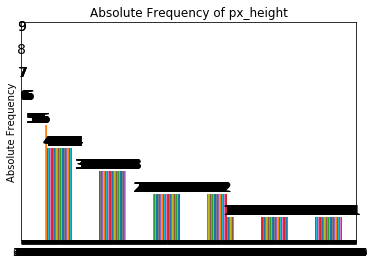

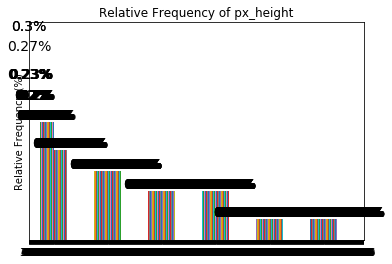

Absolute & Relative Frequency of px_height :


,Absolute Frequency,Relative Frequency(%)
98,9,0.30
371,9,0.30
35,8,0.27
670,7,0.23
346,7,0.23
349,7,0.23
410,7,0.23
211,7,0.23
179,7,0.23
667,7,0.23


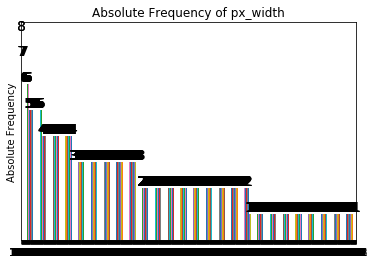

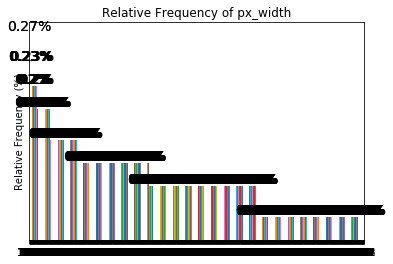

Absolute & Relative Frequency of px_width :


,Absolute Frequency,Relative Frequency(%)
1247,8,0.27
1552,8,0.27
1393,7,0.23
974,7,0.23
1418,7,0.23
874,7,0.23
1234,7,0.23
1203,7,0.23
1463,7,0.23
1726,7,0.23


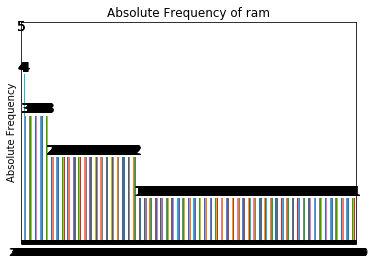

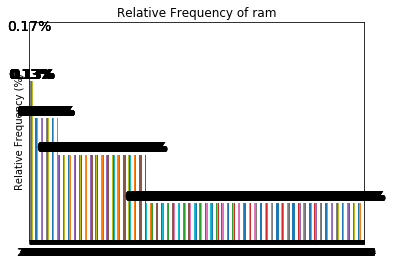

Absolute & Relative Frequency of ram :


,Absolute Frequency,Relative Frequency(%)
2610,5,0.17
3142,5,0.17
2819,5,0.17
2832,4,0.13
625,4,0.13
2563,4,0.13
3206,4,0.13
1886,4,0.13
3153,4,0.13
2334,4,0.13


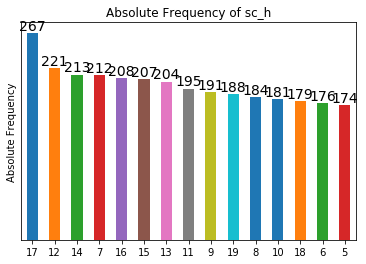

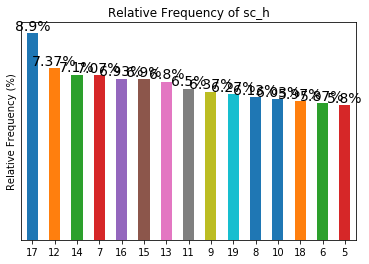

Absolute & Relative Frequency of sc_h :


,Absolute Frequency,Relative Frequency(%)
17,267,8.90
12,221,7.37
14,213,7.10
7,212,7.07
16,208,6.93
15,207,6.90
13,204,6.80
11,195,6.50
9,191,6.37
19,188,6.27


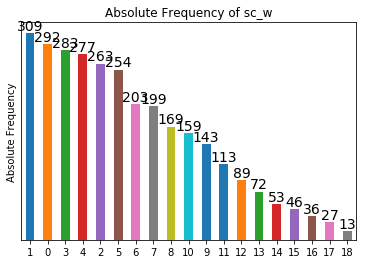

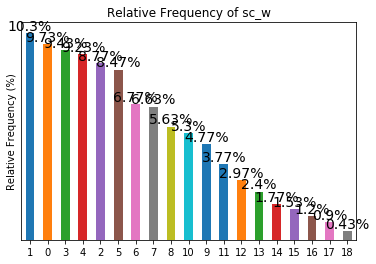

Absolute & Relative Frequency of sc_w :


,Absolute Frequency,Relative Frequency(%)
1,309,10.30
0,292,9.73
3,283,9.43
4,277,9.23
2,263,8.77
5,254,8.47
6,203,6.77
7,199,6.63
8,169,5.63
10,159,5.30


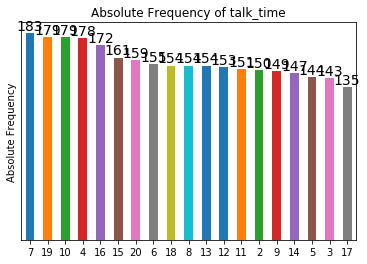

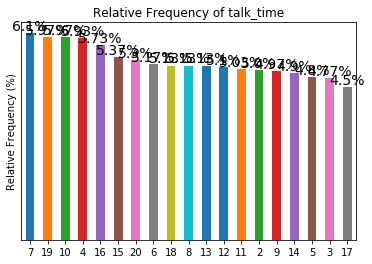

Absolute & Relative Frequency of talk_time :


,Absolute Frequency,Relative Frequency(%)
7,183,6.10
19,179,5.97
10,179,5.97
4,178,5.93
16,172,5.73
15,161,5.37
20,159,5.30
6,155,5.17
18,154,5.13
8,154,5.13


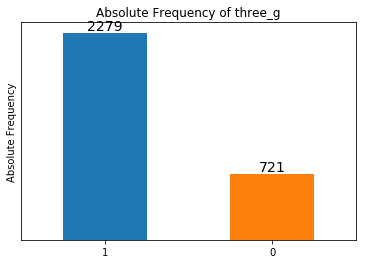

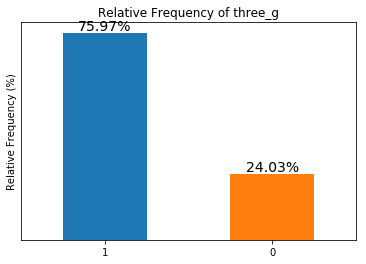

Absolute & Relative Frequency of three_g :


,Absolute Frequency,Relative Frequency(%)
1,2279,75.97
0,721,24.03


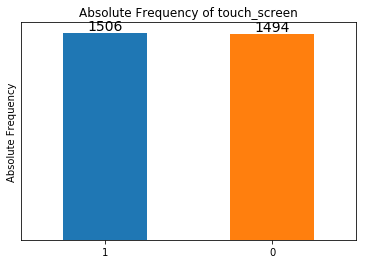

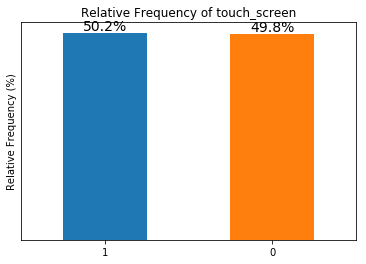

Absolute & Relative Frequency of touch_screen :


,Absolute Frequency,Relative Frequency(%)
1,1506,50.2
0,1494,49.8


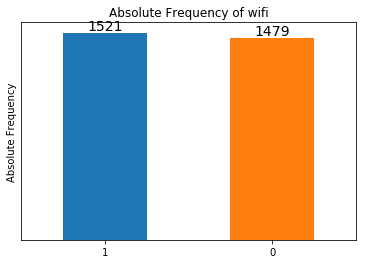

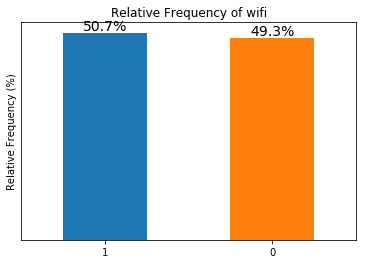

Absolute & Relative Frequency of wifi :


,Absolute Frequency,Relative Frequency(%)
1,1521,50.7
0,1479,49.3


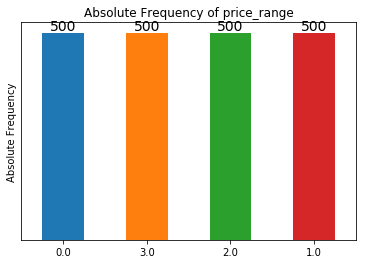

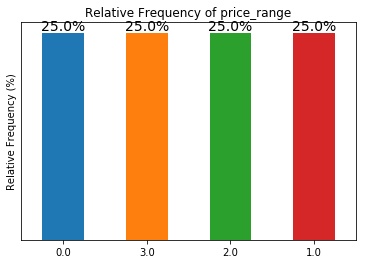

Absolute & Relative Frequency of price_range :


,Absolute Frequency,Relative Frequency(%)
0.0,500,25.0
3.0,500,25.0
2.0,500,25.0
1.0,500,25.0


In [30]:
for f in merged.columns:
    if f != 'id':
        absolute_and_relative_freq(merged[f])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sta

ZeroDivisionError: 0.0 cannot be raised to a negative power

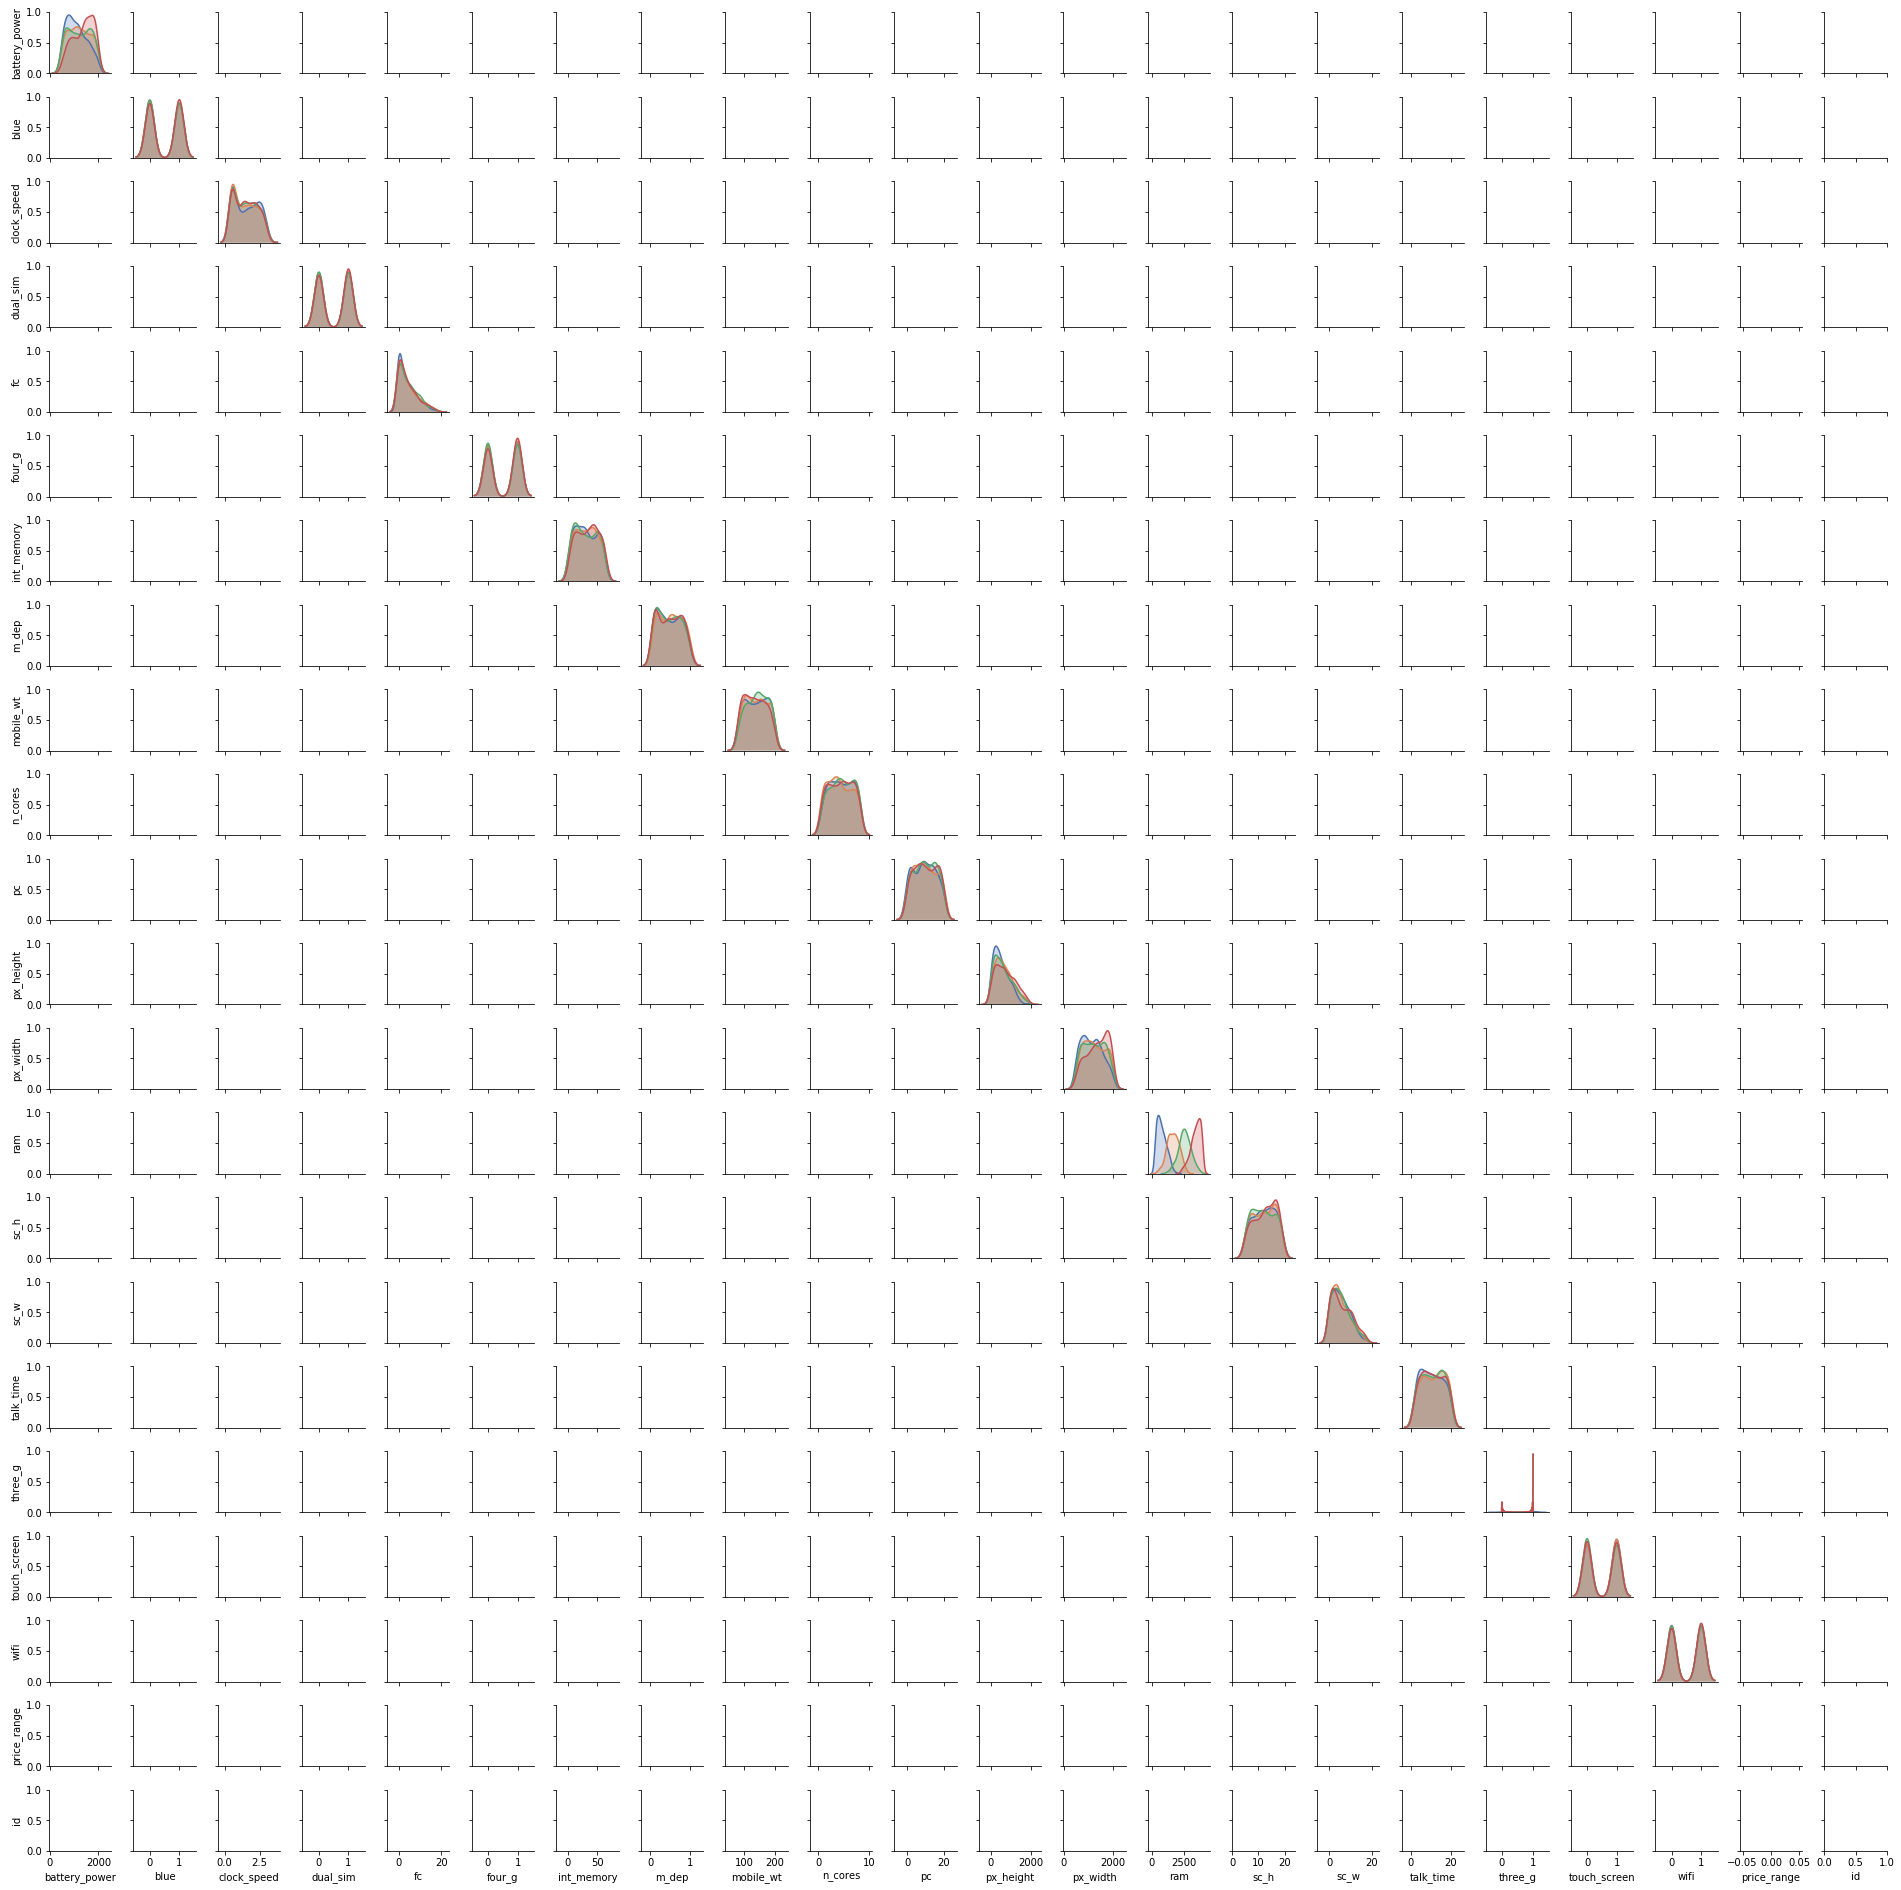

In [32]:
# pair plots of entire dataset
pp = sns.pairplot(merged, hue = 'price_range', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

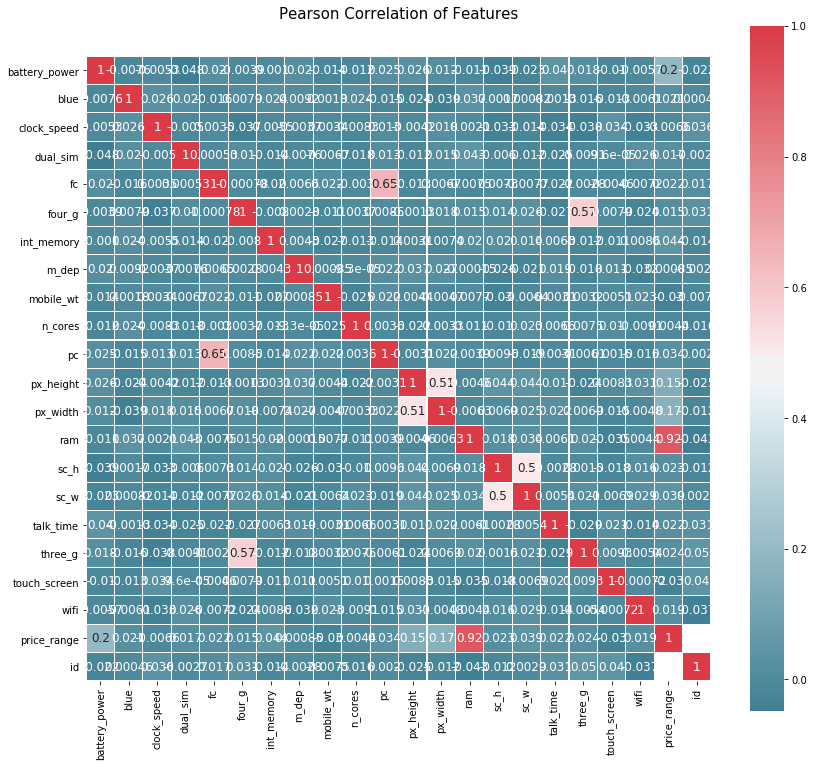

In [37]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(merged)

In [48]:
for f in merged.columns:
    print(f," : ", merged.price_range.corr(merged[f]))

battery_power  :  0.20072261211373096
clock_speed  :  -0.006605690881732063
dual_sim  :  0.017444479237224732
fc  :  0.021998207776904276
four_g  :  0.014771711417239406
int_memory  :  0.044434959388987436
m_dep  :  0.0008530365050864253
mobile_wt  :  -0.030302171314386412
n_cores  :  0.00439927479945729
pc  :  0.0335993002135395
px_height  :  0.14885755500042175
px_width  :  0.16581750172625506
ram  :  0.9170457362649905
sc_h  :  0.022986073167424435
sc_w  :  0.038711271664484175
talk_time  :  0.02185887116237479
three_g  :  0.023611216880045027
touch_screen  :  -0.030411071898217998
wifi  :  0.018784812012788987
price_range  :  1.0
id  :  nan


In [50]:
'''Set a seed for reproducibility'''
seed = 17

"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:2000, :]
df_test  = merged.iloc[2000:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['id'], axis = 1)
df_test = df_test.drop(columns = ['price_range'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(columns = ['price_range'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['price_range'] #Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("id", axis = 1).copy()

'''See the dimensions of input and output data set.'''
display(X_train.shape, X_test.shape, y_train.shape)

(2000, 19)

(1000, 19)

(2000,)

In [52]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

'''Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)

'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), train_accuracy(xgbc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
display(sorted_train_accuracy)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Train_accuracy(%)
SVC,100.00
RF,100.00
DT,100.00
ETC,100.00
GBC,99.85
XGBC,98.05
KNN,95.40
GNB,82.10
LR,79.90
ABC,73.75


In [53]:
'''Create a function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""Let's perform k-fold (k=10) cross validation to find the best classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(gnb), x_val_score(dt), x_val_score(gbc), x_val_score(abc), x_val_score(etc), x_val_score(xgbc)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/

,X_val_score(%)
KNN,92.35
XGBC,91.00
GBC,90.90
RF,88.25
DT,83.10
GNB,81.35
LR,78.05
ETC,75.95
ABC,72.10
SVC,29.85


In [54]:
'''Submission with the most accurate random forest classifier.'''
submission = pd.DataFrame({
        "id": test["id"],
        "price_range": rf.predict(X_test)})
submission.to_csv('submission_rf.csv', index = False)

'''Submission with the most accurate decision tree.'''
submission = pd.DataFrame({
        "id": test["id"],
        "price_range": dt.predict(X_test)})
submission.to_csv('submission_dt.csv', index = False)